# TAHAP MODELING - KAIZEN 2

Pada tahap pengklasifikasian ini menggunakan model CNN-LSTM


### 1. Import Libarary

In [96]:
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard

#untuk model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Reshape, Dropout,MaxPooling1D

### 2. Import Dataset
ini adalah dataset hasil dari pengolahan sebelumnya dan disimpan dalam bentuk file pickle

In [97]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

### 3. Split dataset

In [98]:
X = np.asarray(data_dict['sequences'])
y = np.asarray(data_dict['labels'])

In [99]:
y = to_categorical(y).astype(int)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [101]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((52, 15, 1662), (52, 5), (23, 15, 1662), (23, 5))

### 4. Membuat Callback Tensorbroad

In [102]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

### 5. Tahap Modeling Menggunakan CNN-LSTM


In [103]:
def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [104]:
input_shape = X_train.shape[1:] 
num_classes = 5

In [105]:
cnn_lstm_model = create_cnn_lstm_model(input_shape, num_classes)

In [106]:
cnn_lstm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
history = cnn_lstm_model.fit(X_train, y_train, 
                             epochs=250, 
                             callbacks=[tb_callback],
                             validation_data=( X_test,y_test))

Epoch 1/250
2/2 [==============================] - 6s 791ms/step - loss: 1.6132 - accuracy: 0.2308 - val_loss: 1.6146 - val_accuracy: 0.2174
Epoch 2/250
2/2 [==============================] - 0s 57ms/step - loss: 1.6276 - accuracy: 0.1346 - val_loss: 1.6017 - val_accuracy: 0.1739
Epoch 3/250
2/2 [==============================] - 0s 44ms/step - loss: 1.6204 - accuracy: 0.1346 - val_loss: 1.6067 - val_accuracy: 0.2174
Epoch 4/250
2/2 [==============================] - 0s 46ms/step - loss: 1.6012 - accuracy: 0.1538 - val_loss: 1.6370 - val_accuracy: 0.1304
Epoch 5/250
2/2 [==============================] - 0s 59ms/step - loss: 1.6051 - accuracy: 0.2692 - val_loss: 1.6263 - val_accuracy: 0.1739
Epoch 6/250
2/2 [==============================] - 0s 56ms/step - loss: 1.5863 - accuracy: 0.2885 - val_loss: 1.6493 - val_accuracy: 0.1304
Epoch 7/250
2/2 [==============================] - 0s 43ms/step - loss: 1.5785 - accuracy: 0.2308 - val_loss: 1.6294 - val_accuracy: 0.2174
Epoch 8/250
2/2 [==

In [108]:
cnn_lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 13, 64)            319168    
                                                                 
 conv1d_25 (Conv1D)          (None, 11, 128)           24704     
                                                                 
 conv1d_26 (Conv1D)          (None, 9, 128)            49280     
                                                                 
 lstm_22 (LSTM)              (None, 9, 64)             49408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dense_23 (Dense)            (None, 5)               

### 6. Evaluasi Model 

Plot pengecekan akurasi


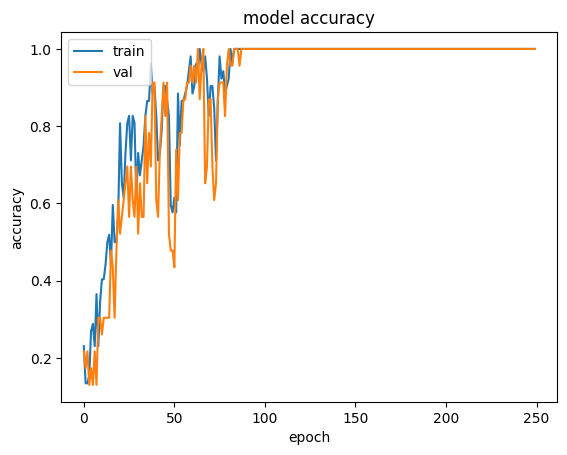

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Plot Pengecekan Loss


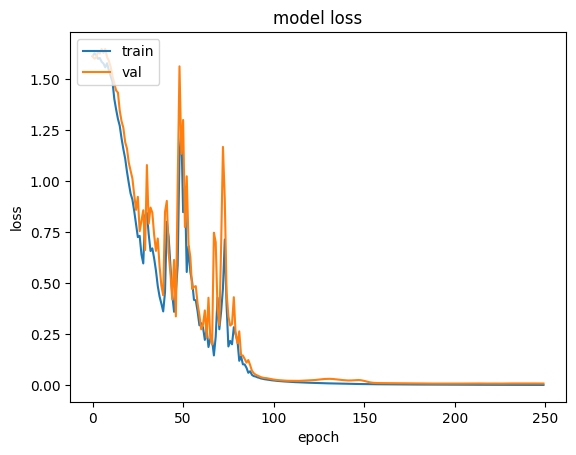

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 7. Menyimpan Model

In [112]:
cnn_lstm_model.save('model_CNN-LSTM-new.h5')